### Feature Scaling (Standardization)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("Social_Network_Ads.csv")
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [11]:
## before applying Standardization, the dataset must be separated into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(df[['Age', 'EstimatedSalary']], df['Purchased'], 
                                                     test_size=0.3,
                                                     random_state=0)

In [13]:
scaler = StandardScaler()
scaler.fit(x_train)   # fitting the scler to the train set, it will learn the parameters
x_train_scaled = scaler.transform(x_train)    # transforming train and test set
x_test_scaled = scaler.transform(x_test)

In [14]:
# the parameters learned
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [15]:
## the output obtained from the StandardScaler is a numpy array, so converting it to pandas dataframe
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

### Changes in the data after applying the Standardization

In [17]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [18]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Visualization of - Effect Of Scaling

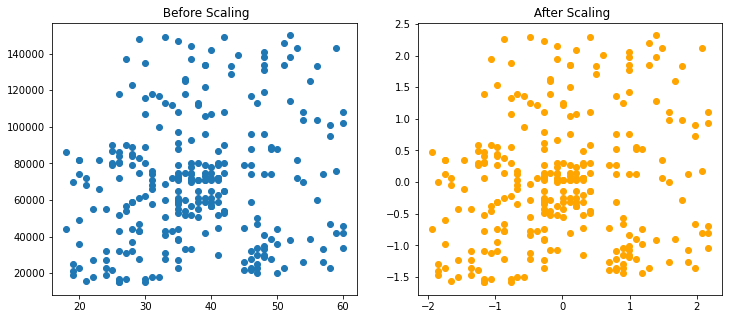

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title(" Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color="orange")
ax2.set_title(" After Scaling")
plt.show()

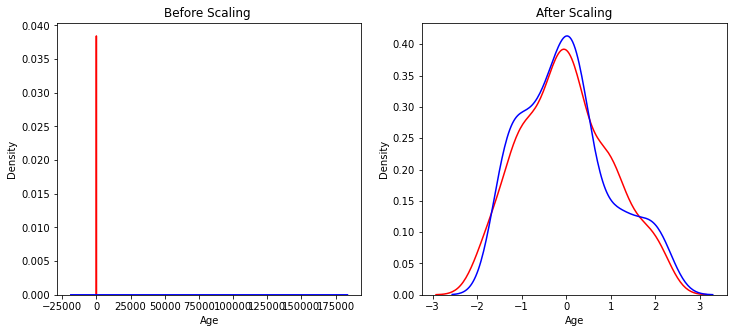

In [25]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Before Scaling ")
sns.kdeplot(x_train['Age'], ax=ax1, color='r')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1, color='b')
ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled['Age'], ax=ax2, color='r')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2, color='b')
plt.show()

### Comparision of Distribution

<AxesSubplot:title={'center':' Age Distribution After Scaling '}, xlabel='Age', ylabel='Density'>

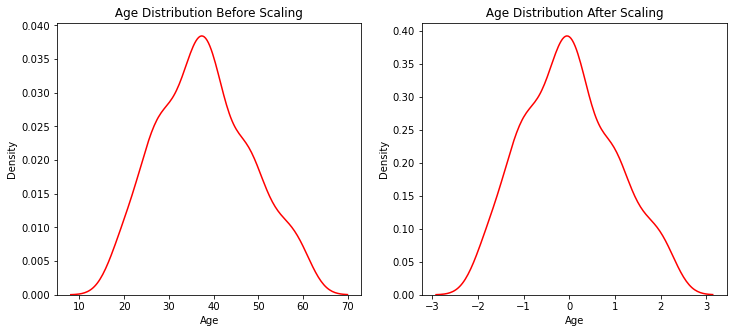

In [27]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title(" Age Distribution Before Scaling ")
ax2.set_title(" Age Distribution After Scaling ")
sns.kdeplot(x_train['Age'], ax=ax1, color='r')
sns.kdeplot(x_train_scaled['Age'], ax=ax2, color='r')

Text(0.5, 1.0, ' EstimatedSalary Distribution After Scaling ')

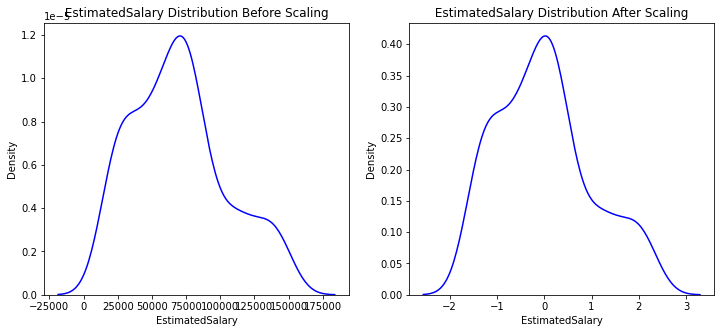

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1, color='b')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2, color='b')
ax1.set_title(" EstimatedSalary Distribution Before Scaling ")
ax2.set_title(" EstimatedSalary Distribution After Scaling ")

### Efftect of Scaling on Model Performance

In [35]:
# Creating two logistic regression classifier and feeding not_scaled and scaled data to see the difference in the performance
lr = LogisticRegression()
lr_scaled = LogisticRegression()
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)
y_pred = lr.predict(x_test)
y_scaled_pred = lr_scaled.predict(x_test_scaled)
print(" Accuracy without scaled data ", accuracy_score(y_test, y_pred))
print(" Accuracy with scaled data ", accuracy_score(y_test, y_scaled_pred))

 Accuracy without scaled data  0.6583333333333333
 Accuracy with scaled data  0.8666666666666667


As clear from the accuracy_score of both the models that the model performs better when the data used for training in scaled properly.